In [ ]:
# in ubuntu linux / colab
# apt install espeak-ng

In [1]:
# in windows, after installing espeak
# %env PHONEMIZER_ESPEAK_LIBRARY=C:/Program Files/eSpeak NG/libespeak-ng.dll

env: PHONEMIZER_ESPEAK_LIBRARY=C:/Program Files/eSpeak NG/libespeak-ng.dll


In [2]:
from transformers import Wav2Vec2Processor, Wav2Vec2ForCTC
import torch

# load model and processor
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-xlsr-53-espeak-cv-ft")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-xlsr-53-espeak-cv-ft")


In [3]:
from pydub import AudioSegment

In [4]:
mp3 = AudioSegment.from_mp3("高金素梅-127888.mp3")

In [38]:
t_start = 66372
t_end = 67506

In [39]:
seg = mp3[t_start:t_end]

In [40]:
seg

In [41]:
import numpy as np
samples = seg.get_array_of_samples()
wav = np.array(samples).astype(np.float32)
wav /= np.iinfo(samples.typecode).max


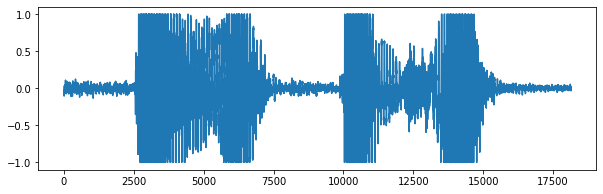

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,3))
plt.plot(wav)

In [43]:
# tokenize
input_values = processor(wav, return_tensors="pt", sampling_rate=16000).input_values

In [44]:
# retrieve logits
with torch.no_grad():
    logits = model(input_values).logits

# take argmax and decode
predicted_ids = torch.argmax(logits, dim=-1)
transcription = processor.batch_decode(predicted_ids)

In [45]:
logits.shape

torch.Size([1, 56, 392])

In [68]:
(t_end-t_start)/logits.shape[1]

20.25

In [46]:
[(x, processor.tokenizer.convert_ids_to_tokens([y])[0]) 
     for x, y
     in zip((torch.arange(0, predicted_ids.shape[1])*20+t_start).tolist(),
            predicted_ids.squeeze().tolist())
     if y>0
]

[(66512, 'p'),
 (66552, 'aɪ'),
 (66692, 'j'),
 (66752, 'i.5'),
 (66812, 'n'),
 (66972, 'p'),
 (67012, 'a5'),
 (67072, 'n'),
 (67092, 'n'),
 (67172, 'ɕ'),
 (67232, 'ə5'),
 (67312, 'n')]

In [56]:
logits.shape

torch.Size([1, 56, 392])

In [57]:
probs = logits.softmax(-1)

<StemContainer object of 3 artists>

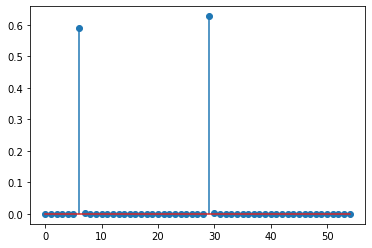

In [67]:
plt.stem(probs[:,1:, 18].squeeze())

In [47]:
predicted_ids

tensor([[  0,   0,   0,   0,   0,   0,   0,  18,   0,  37,   0,   0,   0,   0,
           0,   0,  24,   0,   0,  99,   0,   0,   4,   0,   0,   0,   0,   0,
           0,   0,  18,   0, 106,   0,   0,   4,   4,   0,   0,   0,  74,   0,
           0, 116,   0,   0,   0,   4,   0,   0,   0,   0,   0,   0,   0,   0]])

In [49]:
320/16000

0.02

In [192]:
out = model(input_values)

In [193]:
out

CausalLMOutput(loss=None, logits=tensor([[[  6.5516,  -4.7698,  -4.6840,  ...,  -4.3950,  -4.2148,  -4.4213],
         [  8.5175,  -6.5321,  -6.6265,  ...,  -6.5256,  -6.3116,  -6.5706],
         [  7.7808,  -7.0124,  -7.2176,  ...,  -7.2911,  -6.9038,  -7.2796],
         ...,
         [ 12.6380,  -9.9215, -10.1857,  ...,  -9.6787,  -9.6122,  -9.6653],
         [ 12.9695, -10.2098, -10.4549,  ...,  -9.8959,  -9.9244,  -9.9514],
         [ 12.4993,  -9.7779, -10.0130,  ...,  -9.5481,  -9.5398,  -9.5490]]],
       grad_fn=<AddBackward0>), hidden_states=None, attentions=None)

In [179]:
model.wav2vec2.feature_extractor(torch.ones((1,400))).shape

torch.Size([1, 512, 1])

In [180]:
400/16000

0.025